# Pytorch Lab: Basic Image Classification

Haohang Li  
03/18/2021

Dependencies:

In [1]:
import os
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np

## Colab setting

Because we are gonna to use the gpu instance in this notebook, so please set the following in your colab:


```
Runtime -> Change runtime type -> Hardware accelerator: GPU
```



## Short Introduction to Tensor

### Tensor Operations

The basic building block in Pytorch is the tensor. Tensors are very similar to the narray in the numpy and it has many pre-defined operations:

In [2]:
# define a new tensor is similar to define a numpy array
a_numpy = np.array([7, 7, 7])
a_tensor = torch.Tensor([7, 7, 7])
print('Tensor and Numpy:')
print(a_numpy)
print(a_tensor)
print()

# tensor support basic operations
tensor1 = torch.Tensor([1, 2, 3])
tensor2 = torch.Tensor([2, 3, 4])
print('Basic Operations')
print('Add')
print(tensor1 + tensor2)
print('Multiply')
print(tensor1 * tensor2)
print()

# tensor object also has its own method
print('Tensor Oject method')
print(tensor1.add(tensor2))
print()

# function operates on tensor
print('Function operates on tensor')
max_value, max_index = torch.max(tensor1, dim=0) # pytorch max val -> val, index
max_value, _ = torch.max(tensor1, dim=0) 
print("modification",max_value)
print(f'Max value: {max_value}, Max Index: {max_index}')

Tensor and Numpy:
[7 7 7]
tensor([7., 7., 7.])

Basic Operations
Add
tensor([3., 5., 7.])
Multiply
tensor([ 2.,  6., 12.])

Tensor Oject method
tensor([3., 5., 7.])

Function operates on tensor
modification tensor(3.)
Max value: 3.0, Max Index: 2


Please note these opeartions will return a new tensor as result and the variables participating operations will not be modified. Alternatively, we can make these operations happens in-place. Instead of returing a extra tensor as result, in-place operations will directly change the content of given tensor. 

In [3]:
# not in-plcae
tensor1 = torch.Tensor([1, 2, 3])
tensor2 = torch.Tensor([2, 3, 4])
tensor1.add(tensor2)
print(tensor1)  # the content in tensor1 is not modified

# in-place
tensor1.add_(tensor2)
print(tensor1) # the content in tensor1 is modified

tensor([1., 2., 3.])
tensor([3., 5., 7.])


In general, an in-place is the normal operation with extra '_' at the end. For example,


```
tensor.add() # not in-place
tensor.add_() # in-place

tensor.abs() # not in-place
tensor.abs_() # in-place
```

The in-place operation will be useful when you have limitation on memory. For example, if you have a huge tensor representation for a high resolution image, it may be costly to keep an another copy. For the full list of operations, please see [here](https://pytorch.org/docs/stable/tensors.html).



### Change the shape of the tensor
To change the shape of a tensor, we can use the 

```
Tensor.view()
```
which is similar to numpy.reshape(). Also, we can use -1 as place holder to let the pytorch find the correct shape for us.



In [4]:
# initialize a tensor with random numbers
a_tensor = torch.randn((100, 33, 22, 11), dtype=torch.float)
print(a_tensor.size())  # use Tensor.size() to find the shape
print()


# reshape to (33, 22, 11, 100)
reshaped1 = a_tensor.view(33, 22, 11, 100)
print('After reshape')
print(reshaped1.size())
print()

# use -1 as place holder
reshaped2 = a_tensor.view(33, 11, 10, -1)  # let pytorch calculate the last dimension for us
print('After reshape')
print(reshaped2.size())
print()


torch.Size([100, 33, 22, 11])

After reshape
torch.Size([33, 22, 11, 100])

After reshape
torch.Size([33, 11, 10, 220])



### Move Tensor to GPU/CPU
You may have heard deep learning models are training fatser on GPUs. To do this, we will need to move our data, which is represents as tensors, to GPU.

In [ ]:
# get the device on your machine
cpu = torch.device('cpu')
gpu = torch.device('cuda')

# often we use the following one liner to help us choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# move tensor to gpu
a_tensor = torch.Tensor([1, 2, 3])
a_tensor = a_tensor.to(gpu)  # you might get an error if you did not activate the gpu in your colab, see: https://colab.research.google.com/notebooks/gpu.ipynb
print('GPU tensor:')
print(a_tensor)
print()

# move back to cpu
a_tensor = a_tensor.to(cpu)
print('CPU tensor:')
print(a_tensor)
print()

The 
```
tensor(...., device='cuda:0')
```
menas we have successfully moved tensor to GPU:0.



## MNIST Dataset

#### *Download data*
Load the MINIST dataset:




In [6]:
# load from torch vision package
train_dataset = torchvision.datasets.MNIST('./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST('./data',
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Visulize it:

In [ ]:
one_pic, _ = train_dataset[0]

In [ ]:
one_pic.size() # (channel, width, height)

torch.Size([1, 28, 28])

In [ ]:
one_pic

In [ ]:
print("row:",len(array[0]))
print("col:",len(array[0][0]))

row: 28
col: 28


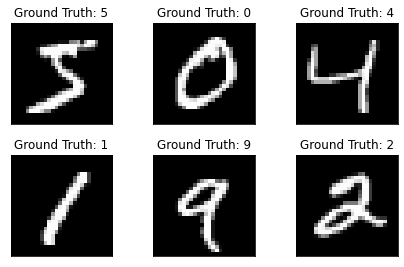

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    cur_data, cur_label = train_dataset[i]
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(cur_data[0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(cur_label))
    plt.xticks([])
    plt.yticks([])

For the load MNIST dataset function:


```
train_dataset = torchvision.datasets.MNIST('./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)
```

The first argument specify the path where you want to save your data, *train = True* means we want to download the train data, *download=True* means to download the data on local directory, *transform=transforms.ToTensor()* will help us convert the data in Tensor format so we don't have to convert the image to tensor manually by ourself.



#### *Batch Training*
We now have the entire training dataset. But in deep learning, we will need to divide the dataset into different mini-batches to help us update the gradient more efficiently. To do this in Pytorch, we just simply: 

In [8]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=128,
                          shuffle=True)
valid_loader = DataLoader(dataset=test_dataset,
                          batch_size=128,
                          shuffle=False)
# 128 images

The 

```
DataLoader(dataset=train_dataset,
          batch_size=128,
          shuffle=True)
```
takes the dataset object as input. In *batch_size* arugemnt, we specify the batch size of our mini batch to 128. And in *shuffle* argument, we tell the *DataLoader* we wish to random shuffle the dataset before slicing it to different batches.



The *DataLoader()* will return a generator and we can get our mini batch by iterating the iterator:

In [9]:
# train: 1 mini batch contains 128 observations
train_iterator = train_loader.__iter__()
train_sample_image, train_sample_label = next(train_iterator)

# test: 1 mini batch contains 128 observations
valid_iterator = valid_loader.__iter__()
valid_sample_image, valid_sample_label = next(valid_iterator)

# print
print('Train Sample')
print('1 of 128 train sample', train_sample_image.shape)
print('1 of 128 train label', train_sample_label.shape)
print('Test Sample')
print('1 of 128 test sample', valid_sample_image.shape)
print('1 of 128 test label', valid_sample_label.shape)

Train Sample
1 of 128 train sample torch.Size([128, 1, 28, 28])
1 of 128 train label torch.Size([128])
Test Sample
1 of 128 test sample torch.Size([128, 1, 28, 28])
1 of 128 test label torch.Size([128])


## A Naive Classifier

### *Define a model*
With the datase, let's build a a deep learning model to classify the MINIST dataset. For simplicity, our deep learning model will only have:
- One input layer
- One hidden layer with relu as our activation function
- One output layer




In [10]:
class FeedForward(nn.Module):  # just add (nn.Module) after your model name
    # model = FeedForward(input_size=28 * 28, hidden_size=512, num_classes=10)
    def __init__(self, input_size, hidden_size, num_classes):  # define the layers we need to construct the model
        super(FeedForward, self).__init__()  # initilize the parent nn.Module class
        self.Linear1 = nn.Linear(input_size, hidden_size)  # define our hidden layer here, the input shape of the layer is input_size and out shape is hidden_size
        self.act = nn.ReLU()  # define the relu activation function
        self.Linear2 = nn.Linear(hidden_size, num_classes) # define our output layer. The input shape should be the output shape of hiddden layer
       
    def forward(self, x):  # define the how the input tensors flows the different layers
        out1 = self.Linear1(x)
        out = self.act(out1)
        out = self.Linear2(out)
        
        # tensor flow path: Input layer -> Relu activation function -> Output layers

        return out 

Few things to note:  
1. The model in Pytorch are defined in class. Our model need to inherit from the nn.Module parent class. If you are not familar with the object programming in python, just make sure you add the *(nn.Module)* after your model name.
2. In our model, we will need to implement two functions:


```
def __init__()
```
In general, the `__init__` function holds the follows:
-  Initialize layers with parameters which should be trained, e.g. `nn.Linear` 
- Other layers, although without parameters, need to be initiated as class objects, e.g. `nn.ReLU`. Alternatively, you can use `torch.nn.functional.relu` directly in forward function instead of class nn.ReLU
- Stateful layers such as `nn.Dropout`. When Dropout is placed in `__init__`, it is enabled in training but disabled in evaluation mode.


```
def forward(self, x)
```
to define how the tensor are passed through different layers. In our case, the data will be first pass though the hidden layer. The output of hidden layer will pass though the *relu* activation function. And then the output of *relu* function will be passed though output layer.
3. Please do not forget to initialize the parent class, just add


```
super(FeedForward, self).__init__()
```
in your


```
def __init__()
```
function
4. In the Pytorch the *Dense* layer is called *Linear*. However, different from Keras, *Linear* layer does not come with an activation function. Activation functions need to be defined separately. The *Linear* layer takes three arguments:


```
torch.nn.Linear(in_features, out_features, bias=True)
```
The *Linear* layer will perform the following transorm on tensor:
$$y = xA^T + b$$

The *in_features* will be the shape of input tensor($x$), the *out_features*($y$) will be the shape of output tensor, the *bias* means whether we want to include bias($b$).


5. You might have noticed we did not add the *softmax()* function after the output layer to convert the output nubmer to probability for each class. Later, we will use 
```
torch.nn.CrossEntropyLoss()
```
which contains a softmax function inside of it.




### *Train the model*
Let's define the training function of the model:

In [11]:
def train(batch_size, num_epochs, learning_rate, model, train_loader, valid_loader, device):
  # move the model to device
  model = model.to(device)  # move the model to gpu or cpu

  # set up loss function and optimizer
  criterion = nn.CrossEntropyLoss()  # the CrossEntropyLoss() will provide the softmax for us
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # pass in the parameters to be updated and learning rate

  # traning loop
  print('Training Starts:')
  num_total_steps = len(train_loader)
  for epoch in range(num_epochs):
      model.train()  # start to train the model, activate training behavior
      train_loss = 0
      for i, (images, labels) in enumerate(train_loader):
          # reshape images
          images = images.reshape(-1, 28 * 28).to(device)  # reshape: from (128, 1, 28, 28) -> (128, 28 * 28) = (128, 284), move batch to device
          labels = labels.to(device)  # move to device
          
          # forward
          outputs = model(images)  # forward
          cur_train_loss = criterion(outputs, labels)  # loss

          # backward
          cur_train_loss.backward()  # run back propagation
          optimizer.step()  # optimizer update all model parameters
          optimizer.zero_grad()  # set gradient to zero, avoid gradient accumulating

          # loss
          train_loss += cur_train_loss



      # valid
      model.eval()  # start to train the model, activate training behavior
      with torch.no_grad():  # tell pytorch not to update parameters
          val_loss = 0
          for images, labels in valid_loader:
              # calculate validation loss
              images = images.reshape(-1, 28 * 28).to(device)
              labels = labels.to(device)
              outputs = model(images)
              cur_valid_loss = criterion(outputs, labels)
              val_loss += cur_valid_loss
      
      # print
      print(f"Epoch:{epoch + 1} / {num_epochs}, train loss:{(train_loss/len(train_loader)).item():.5f}, valid loss:{(val_loss/len(valid_loader)).item():.5f}")

Let's breakdown the function:
1. In order to use GPU to train our model, we will need to move the model and the training data to the correspond device


```
model.to(device)
....
images = images.reshape(-1, 28 * 28).to(device) 
```
2. The loss function *CrossEntropyLoss* will provide us a softmax function and it expectes a class index $[0, C - 1]$ where the $C$ is the number of classes in the training data. In other words, we don't need to apply one-hot encoding in pytorch before using the cross entropy function, the Pytorch will handel the conversion for us. Full document can be found [here](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).
3. We are using the Adam optimizer and the optimizer takes two inputs:


```
torch.optim.Adam(params, lr)
params: the parameters to be updated by the optimizer
lr: learning rate
```
In our case, we want the optimizer to track all parameters in the model. Other optimizers are also available, [see](https://pytorch.org/docs/stable/optim.html)

4. *model.train()* and *model.eval()*: with the *model.train()*, it will activate some training behavior in layers(For exampel, to activate the dropdout behavior to let *dropout* layer random sample neurons in training session). With the *model.eval()*, it will activate some evaluation behavor in layers(For example, in evaluation session, we wish the output of dropout layers to multiply the drop ratio and stop randomly sampling the neurons)
5. Batch training:


```
for epoch in range(num_epochs):
      for i, (images, labels) in enumerate(train_loader):
```
At each epoch, we wish the data is passed in batches.
6. A typical training procedure for pytorch is:

a forward seesion to calculate the loss of current batch
```
outputs = model(images)  # forward
train_loss = criterion(outputs, labels)  # loss
```
then we call back probagation to calculate the gradient for each parameters


```
train_loss.backward()
```
with the calculated gradients, call the optimizer to update each parameters
```
optimizer.step()
```
and please do not forget to call
```
optimizer.zero_grad()
```
to zero the gradients in optimizer. In the default behavior, the optimizer will try to remember all grident history and accumulate the gradients. Usually it is not the behavior we desired, so we manually clear the gradient history to prevent gradient accumulation.

7. When we evluate the model, we will need to use
```
with torch.no_grad():
  ...
```
to tell pytorch stop calculating the gridents in the evaluation session. We don't want evaluation data to have any interaction with our model so we explictly tell Pytorch no gradients.

8. In training seesion, we reshped the training batch data:

```
images = images.reshape(-1, 28 * 28).to(device)
```
This is because: in default, the Pytorch assume the image data will have the format:
```
(num_batch, channels, width, height) -> (128, 1, 28, 28)
```
We wish to use a feed forward neural network to classify the image, so we will need to flatten the data to
```
(num_batch, width * height) -> (128, 28 * 28)
``` 










All set and ready to go, let's call the train function to train our model:

In [12]:
# define model
model = FeedForward(input_size=28 * 28, hidden_size=512, num_classes=10)

# train
train(batch_size=128,
      num_epochs=20,
      learning_rate=0.01,
      model=model,
      train_loader=train_loader,
      valid_loader=valid_loader, 
      device=device)

Training Starts:
Epoch:1 / 20, train loss:0.20848, valid loss:0.12331
Epoch:2 / 20, train loss:0.11178, valid loss:0.11772
Epoch:3 / 20, train loss:0.08768, valid loss:0.11638
Epoch:4 / 20, train loss:0.07790, valid loss:0.12986
Epoch:5 / 20, train loss:0.06659, valid loss:0.13298
Epoch:6 / 20, train loss:0.05989, valid loss:0.14194
Epoch:7 / 20, train loss:0.06205, valid loss:0.15494
Epoch:8 / 20, train loss:0.05110, valid loss:0.17525
Epoch:9 / 20, train loss:0.05552, valid loss:0.15248
Epoch:10 / 20, train loss:0.05065, valid loss:0.19719
Epoch:11 / 20, train loss:0.05306, valid loss:0.23335
Epoch:12 / 20, train loss:0.04322, valid loss:0.21652
Epoch:13 / 20, train loss:0.03858, valid loss:0.22559
Epoch:14 / 20, train loss:0.04830, valid loss:0.25715
Epoch:15 / 20, train loss:0.05331, valid loss:0.29230
Epoch:16 / 20, train loss:0.03694, valid loss:0.27267
Epoch:17 / 20, train loss:0.03803, valid loss:0.29438
Epoch:18 / 20, train loss:0.03588, valid loss:0.23054
Epoch:19 / 20, train

## Early Stopping
To add the early stopping into our training, we just need to slightly modify our train function:

In [13]:
def train_earlyStopping(batch_size, num_epochs, learning_rate, model, train_loader, valid_loader, device, no_improve_eopchs):
  # move the model to device
  model.to(device)

  # new: early stopping
  min_val_loss = 10000
  epochs_no_improvement = 0

  # set up loss function and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # traning loop
  print('Training Starts:')
  model.train()
  num_total_steps = len(train_loader)
  for epoch in range(num_epochs):
      train_loss = 0
      for i, (images, labels) in enumerate(train_loader):
          # reshape images
          images = images.reshape(-1, 28 * 28).to(device)
          labels = labels.to(device)
          
          # forward
          outputs = model(images)
          cur_train_loss = criterion(outputs, labels)

          # backward
          cur_train_loss.backward()
          optimizer.step()
          optimizer.zero_grad()

          # loss
          train_loss += cur_train_loss
      train_loss /= len(train_loader)



      # valid
      model.eval()
      with torch.no_grad():
          val_loss = 0
          for images, labels in valid_loader:
              # calculate validation loss
              images = images.reshape(-1, 28 * 28).to(device)
              labels = labels.to(device)
              outputs = model(images)
              cur_valid_loss = criterion(outputs, labels)
              val_loss += cur_valid_loss
          val_loss /= len(valid_loader)
      
      # early stopping
      if val_loss < min_val_loss:
        torch.save(model.state_dict(), 'model.pth')
        epochs_no_improvement = 0
        min_val_loss = val_loss
      else:
        epochs_no_improvement += 1
      
      if epoch > 5 and epochs_no_improvement > no_improve_eopchs:
        print("Early Stopping")
        break
      
      # print
      print(f"Epoch:{epoch + 1} / {num_epochs}, train loss:{train_loss:.5f}, valid loss:{val_loss:.5f}")

In this new fucntion, we add the code block:


```
if val_loss < min_val_loss:
        torch.save(model.state_dict(), 'model.pth')
        epochs_no_improvement = 0
        min_val_loss = val_loss
      else:
        epochs_no_improvement += 1
      
      if epoch > 5 and epochs_no_improvement > no_improve_eopchs:
        print("Early Stopping")
        break
```
If the current validation loss is less than the minimal validation history, we will save the model. If the model does not improve its performance after *no_improve_eopchs* epochs, then we will stop the training process.



Train the model and load early stopped model:

In [14]:
# define model
model = FeedForward(input_size=28 * 28, hidden_size=512, num_classes=10)

# train
train_earlyStopping(batch_size=128,
                    num_epochs=20,
                    learning_rate=0.01,
                    model=model,
                    train_loader=train_loader,
                    valid_loader=valid_loader, 
                    device=device,
                    no_improve_eopchs=3)

# load the early stopped model
early_stopped_model = FeedForward(input_size=28 * 28, hidden_size=512, num_classes=10)
early_stopped_model.load_state_dict(torch.load('model.pth', map_location=device))  # <All keys matched successfully> means the model is loaded

Training Starts:
Epoch:1 / 20, train loss:0.20526, valid loss:0.12547
Epoch:2 / 20, train loss:0.11103, valid loss:0.10471
Epoch:3 / 20, train loss:0.08791, valid loss:0.11859
Epoch:4 / 20, train loss:0.07353, valid loss:0.12165
Epoch:5 / 20, train loss:0.07048, valid loss:0.14656
Epoch:6 / 20, train loss:0.06542, valid loss:0.12438
Early Stopping


<All keys matched successfully>